In [59]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import prettypyplot as pplt

import pymbar
from pymbar import timeseries

import os
import sys
import tables as tb
import mdtraj as md
import scipy.stats as sps

upside_path = '/project/dinner/scguo/upside2'
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

import mdtraj_upside as mu
# import upside_engine as ue

In [2]:
plt.style.use("custom")
plt.style.use("muted")
pplt.load_cmaps()

### Andy's $\Delta G$ (from Sup)
**IMPORTANT**: HX (_45 and _65) computed with *non-P71A* mutant (the typical GD fs mutant),
but $m$-values computed with *P71A* mutant

In [3]:
a_dg_file = '/project/dinner/aanto/kaiB/up2/andys_dgs.csv'
a_dgs = np.genfromtxt(a_dg_file, delimiter=',')

a_dg_file1 = '/project/dinner/aanto/kaiB/up2/dgs_al_45.csv'
a_dg_file2 = '/project/dinner/aanto/kaiB/up2/dgs_al_65.csv'
a_ms_file = '/project/dinner/aanto/kaiB/up2/dgs_al_mvalue_new.csv'
a_dgs1 = np.genfromtxt(a_dg_file1, delimiter=',')
a_dgs2 = np.genfromtxt(a_dg_file2, delimiter=',')
a_ms = np.genfromtxt(a_ms_file, delimiter=',')

# whether the residues are in ex2 regime or not (assigned by looking at pH dependence)
in_ex2 = a_dgs1[a_dgs1[:, -2] == 1, -1]

in_region1 = a_dgs1[:,-2].astype(bool)
in_region2 = a_dgs2[:,-2].astype(bool)
in_region3 = a_ms[:,-2].astype(bool)
a_dgs1_trimmed = a_dgs1[in_region1]
a_dgs2_trimmed = a_dgs2[in_region2]
a_ms_trimmed = a_ms[in_region3]

In [126]:
color_arr = []
alpha_arr = []

for r in np.arange(0, 99):
    if r >= 8 and r <= 13:
        color='crimson'
    elif r >= 20 and r <= 34:
        color='crimson'
    elif r >= 40 and r <= 45:
        color='crimson'
    elif r >= 49 and r <= 55:
        color = 'orchid'
    elif r >= 63 and r <= 68:
        color='darkorange'
    elif r >= 72 and r <= 76:
        color='forestgreen'
    elif r >= 83 and r <= 95:
        color='mediumblue' 
    else: 
        color='slategray'
    
    if np.isin(r + 1, a_dgs1_trimmed[:,-1]):
        alpha1 = 1
    else:
        alpha1 = 0.3
    if np.isin(r + 1, a_dgs2_trimmed[:,-1]):
        alpha2 = 1
    else:
        alpha2 = 0.3
    if np.isin(r + 1, a_ms_trimmed[:,-1]):
        alpha3 = 1
    else:
        alpha3 = 0.3
    color_arr.append(color)
    alpha_arr.append([alpha1, alpha2, alpha3])
color_arr = np.asarray(color_arr)
alpha_arr = np.asarray(alpha_arr)

# Load data - For FS (all trans)

In [12]:
pdb_id = 'fs_almut_p71a'
start_frame = 2000 # skip first 2000 frames
work_dir = '/project/dinner/scguo/kaiB/p71a/run_0'
n_rep = 48 # replica number
input_dir = f"{work_dir}/inputs"
result_dir = f"{work_dir}/outputs"

In [15]:
Pot = []
Hb = []
Ts = []
T  = []
PS = []
for i in range(n_rep):
    j=str(i).zfill(2)
    Pot.append(np.load(f'{result_dir}/{pdb_id}.run.{j}_Energy.npy')[:,0])  
    Hb.append(np.load(f'{result_dir}/{pdb_id}.run.{j}_Hbond.npy')) 
    PS.append(np.load(f'{result_dir}/{j}_ps.npy'))
    t = np.load(f'{result_dir}/{pdb_id}.run.{j}_T.npy')
    nsize = Pot[-1].size
    Ts.append(np.zeros(nsize) + t)
    T.append(t)
    
Pot  = np.array(Pot)
Hb   = np.array(Hb)
Ts   = np.array(Ts)
T    = np.array(T)
PS   = np.array(PS)

# only the residue numbers which have experimental data
res = np.loadtxt('/project/dinner/scguo/kaiB/fs_almut.resid', dtype=int)
n_res = res.size

print(PS.shape, Pot.shape)

(48, 62196, 92) (48, 62196)


## MBAR reweighting

In [16]:
kB = 1.0 # upside unit
T = np.array(T)
beta = 1 / (kB * T)

cE0 = Pot[:,start_frame:]

FN = cE0[0].size
FNs = np.zeros([n_rep], np.int32) + FN
reducedPot0 = np.zeros([n_rep,n_rep,FN], np.float32)
for k in range(n_rep):
    for l in range(n_rep):
        reducedPot0[k,l] = beta[l] * cE0[k]

In [17]:
mbar0 = pymbar.MBAR(reducedPot0, FNs, verbose=True)

K (total states) = 48, total samples = 2889408
N_k = 
[60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196
 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196
 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196
 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196 60196]
There are 48 states with samples.
Initializing free energies to zero.
Initial dimensionless free energies with method zeros
f_k = 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Determining dimensionless free energies by Newton-Raphson / self-consistent iteration.
self consistent iteration gradient norm is 3.6067e+11, Newton-Raphson gradient norm is 4.5826e+11
Choosing self-consistent iteration on iteration 0
self consistent iteration gradient norm is 1.6204e+11, Newton-Raphson gradient norm is 2.4609e+11
Choosing self-consistent iteration for low

## Calculate $\Delta G_{\mathrm{HX}}$ at different temperatures (melting curves)

In [18]:
dGhx_T = np.zeros((T.size, n_res))
for k in range(T.size):
    t = T[k]
    tt = t / 0.85 * 298. # "real" temperature in K (estimated)
    
    # convert back to unstandardized energies (not in units of kT)
    u_n = (cE0 / (t * kB)).flatten()
    log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
    # normalize weights
    w1 = np.exp(log_w1)
    w1 /= np.sum(w1)
    
    # use eq. 4.8 in Adam's thesis
    for r in range(n_res):
        pf_i = PS[:,start_frame:,r].flatten()
        mean_pf = np.average(pf_i, weights=w1)
        if mean_pf == 1:
            print(k, r)
            dGhx_T[k, r] = 1000.
        else:
            dGhx_T[k, r] = 0.001987 * tt * np.log((mean_pf / (1 - mean_pf))) # units of kcal/mol

In [19]:
print(dGhx_T.shape)

(48, 91)


In [21]:
np.save(f"{result_dir}/dghx.npy", dGhx_T)

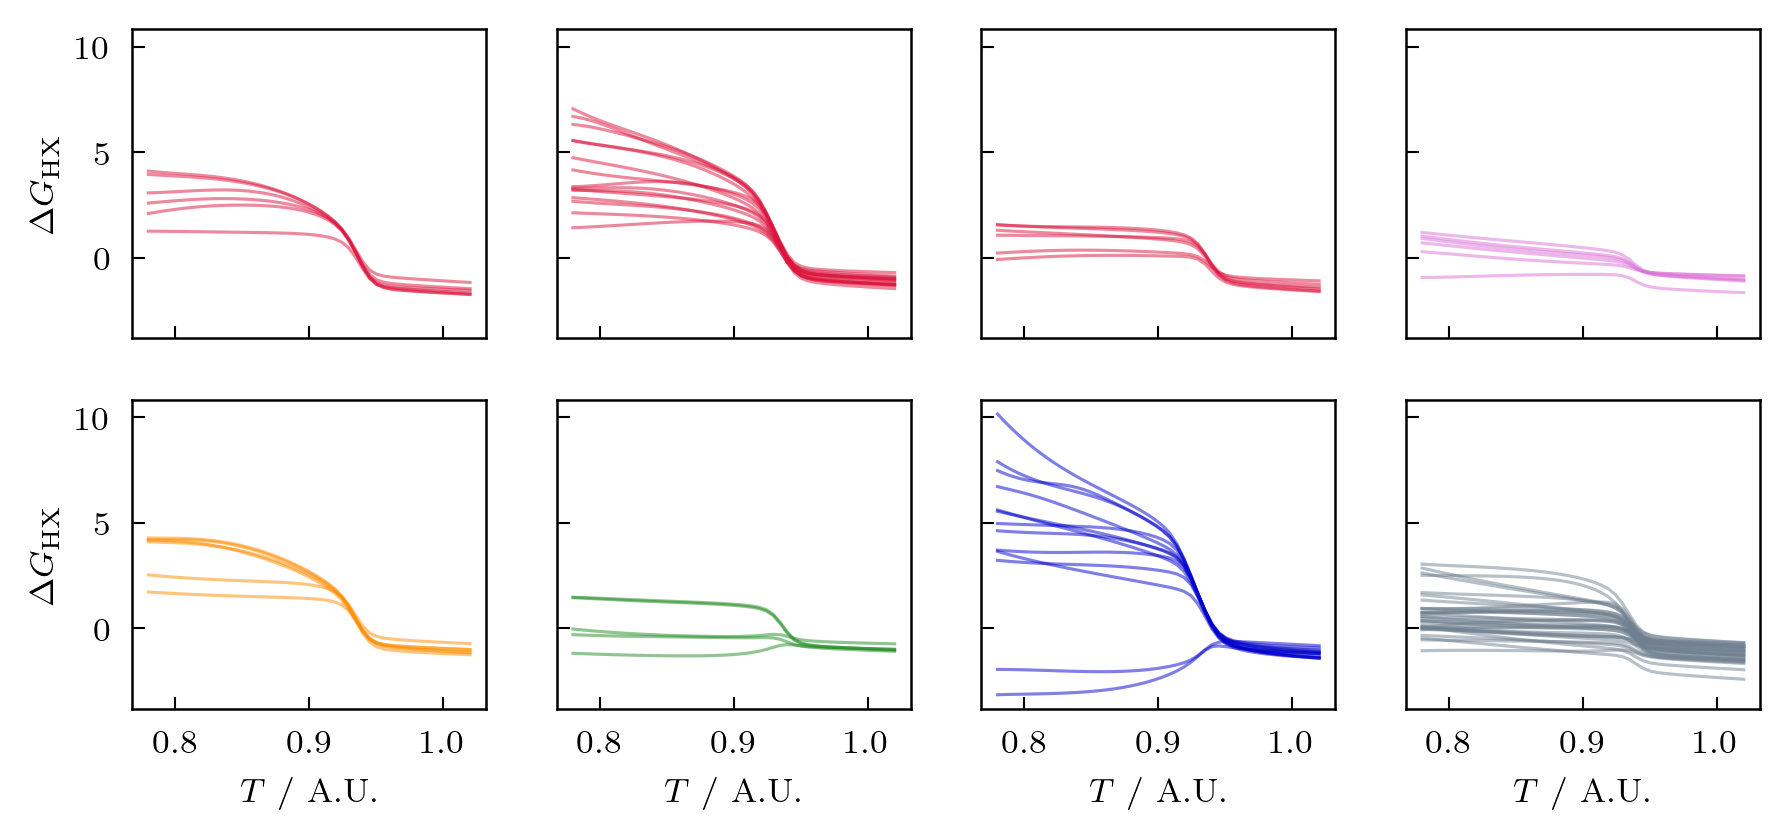

In [40]:
f, axs = plt.subplots(2, 4, figsize=(7,3), dpi=300, sharey=True, sharex=True)

for i, (r, color) in enumerate(zip(res, color_arr[res])):
    if r >= 8 and r <= 13:
        j, k = 0, 0
    elif r >= 20 and r <= 34:
        j, k = 0, 1
    elif r >= 40 and r <= 45:
        j, k = 0, 2
    elif r >= 49 and r <= 55:
        j, k = 0, 3
    elif r >= 63 and r <= 68:
        j, k = 1, 0
    elif r >= 72 and r <= 76:
        j, k = 1, 1
    elif r >= 83 and r <= 95:
        j, k = 1, 2
    else: 
        j, k = 1, 3

    axs[j, k].plot(T, dGhx_T[:, i], color=color, alpha=0.5)

for a in axs.flat:
    a.set_xlabel('$T$ / A.U.')
    a.set_ylabel('$\Delta G_{\mathrm{HX}}$')
    a.label_outer()

# Calculate $\Delta G_{\mathrm{HX}}$ as a function of denaturant

In [36]:
T_target = 0.875   # the T you want to use 
m_sens = 0.25  # it is the sensitivity of the denaturant.
                 # a larger value means a lower concentration 
                 # to unfold the protein
                 # 0.05 is a not bad initial guess for urea

# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:, start_frame:, :], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 5
den_bin = 50
den = np.linspace(den_min, den_max, den_bin+1)

# reweight to T_target
TT = T_target / 0.85 * 298
m = m_sens * -pf_frame
u_n = (cE0 / (T_target * kB)).flatten()
log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
w1 = np.exp(log_w1)
w1 /= np.sum(w1)

# dG at different [den]
dGhx_D = []
for d in den:
    # weight depends on denaturant concentration
    w = np.exp(m * d / T_target) * w1
    w /= np.sum(w)
    
    probp = np.zeros(n_res)
    for j in range(n_res):
        pf_i = PS[:, start_frame:, j].flatten()
        probp[j] = np.sum(pf_i * w)
    dGhx_D.append(TT * np.log(probp / (1. - probp)) * 0.001987)
dGhx_D = np.array(dGhx_D)

# m-value: negative of initial slope of dG vs [den] 
mValue = np.diff(dGhx_D, axis=0) / (den[0] - den[1])

In [51]:
np.save(f"{result_dir}/dghx_den.npy", dGhx_D)
np.save(f"{result_dir}/m_sens25.npy", mValue)

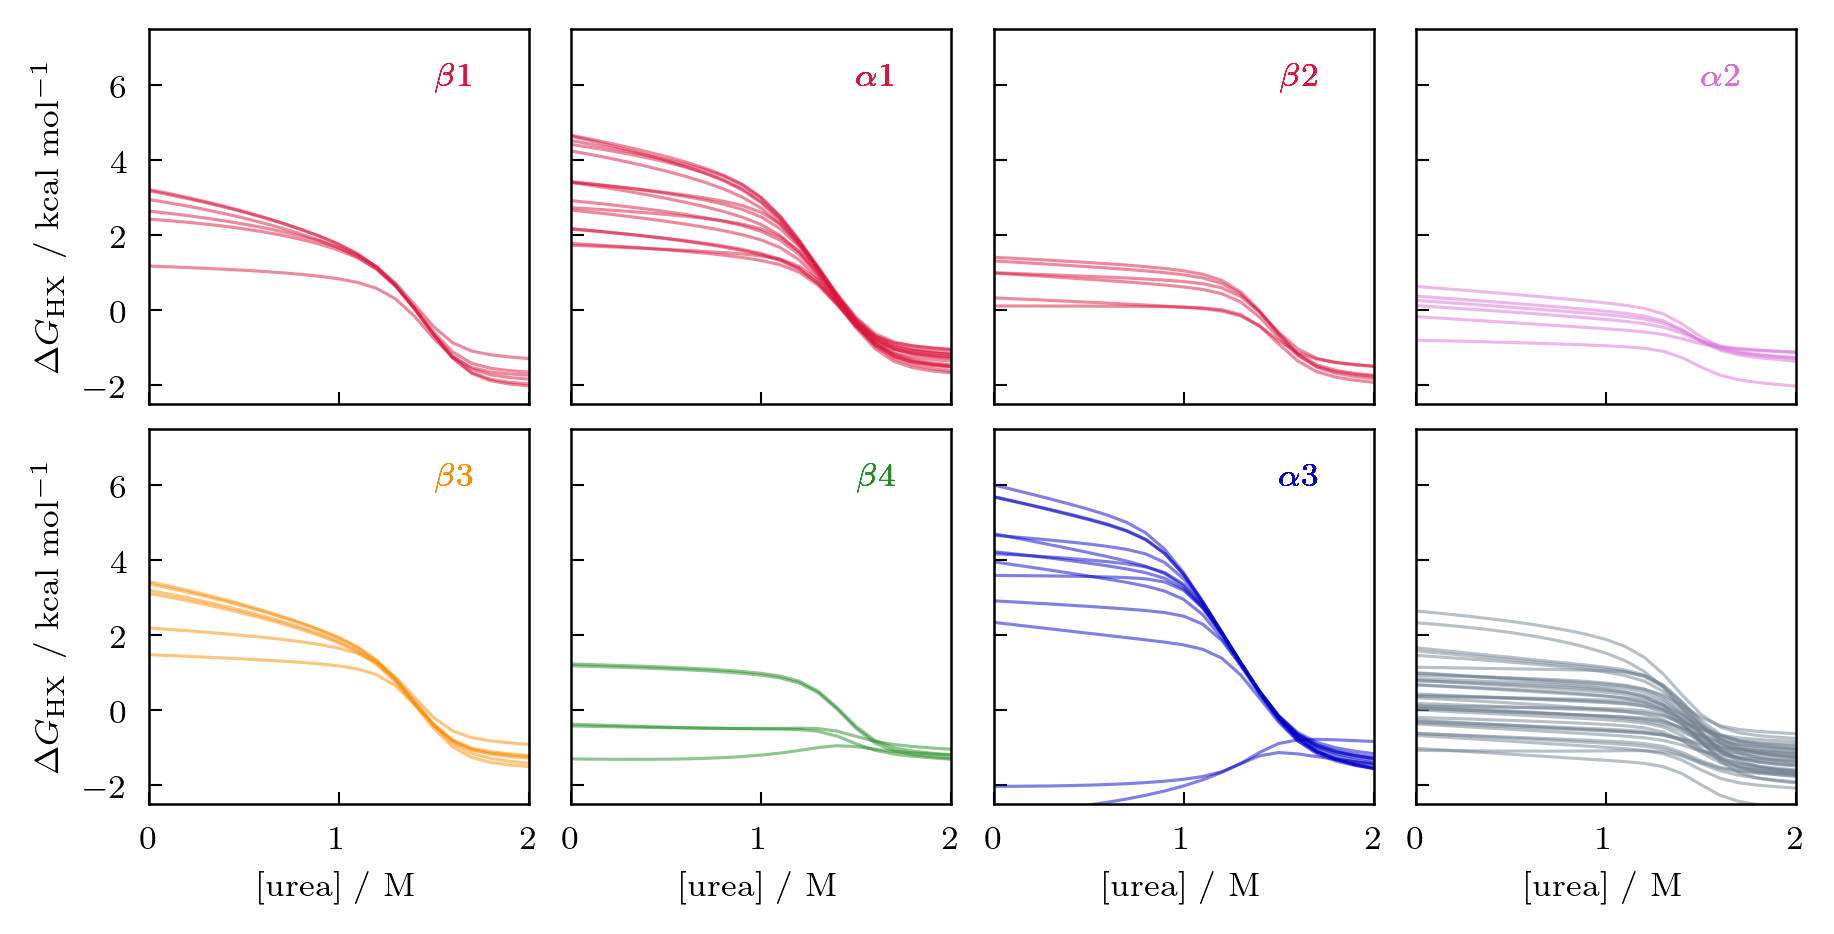

In [64]:
f, ax = plt.subplots(2, 4, figsize=(6,3), dpi=300, sharey=True, sharex=True, constrained_layout=True)

for i, (r, color) in enumerate(zip(res, color_arr[res])):
    if r >= 8 and r <= 13:
        j, k = 0, 0
        text = r'$\beta 1$'
    elif r >= 20 and r <= 34:
        j, k = 0, 1
        text = r'$\alpha 1$'
    elif r >= 40 and r <= 45:
        j, k = 0, 2
        text = r'$\beta 2$'
    elif r >= 49 and r <= 55:
        j, k = 0, 3
        text = r'$\alpha 2$'
    elif r >= 63 and r <= 68:
        j, k = 1, 0
        text = r'$\beta 3$'
    elif r >= 72 and r <= 76:
        j, k = 1, 1
        text = r'$\beta 4$'
    elif r >= 83 and r <= 95:
        j, k = 1, 2
        text = r'$\alpha 3$'
    else: 
        j, k = 1, 3
        text=''
    ax[j, k].plot(den, dGhx_D[:,i], color=color, alpha=0.5)
    ax[j, k].text(1.5, 6, text, color=color)

ax[0,0].set_xlim([0, 2])
ax[0,0].set_ylim([-2.5, 7.5])
for a in ax.flat:
    a.set_xlabel('[urea] / M')
    a.set_ylabel('$\Delta G_{\mathrm{HX}}$ / kcal mol$^{-1}$')
    a.label_outer()

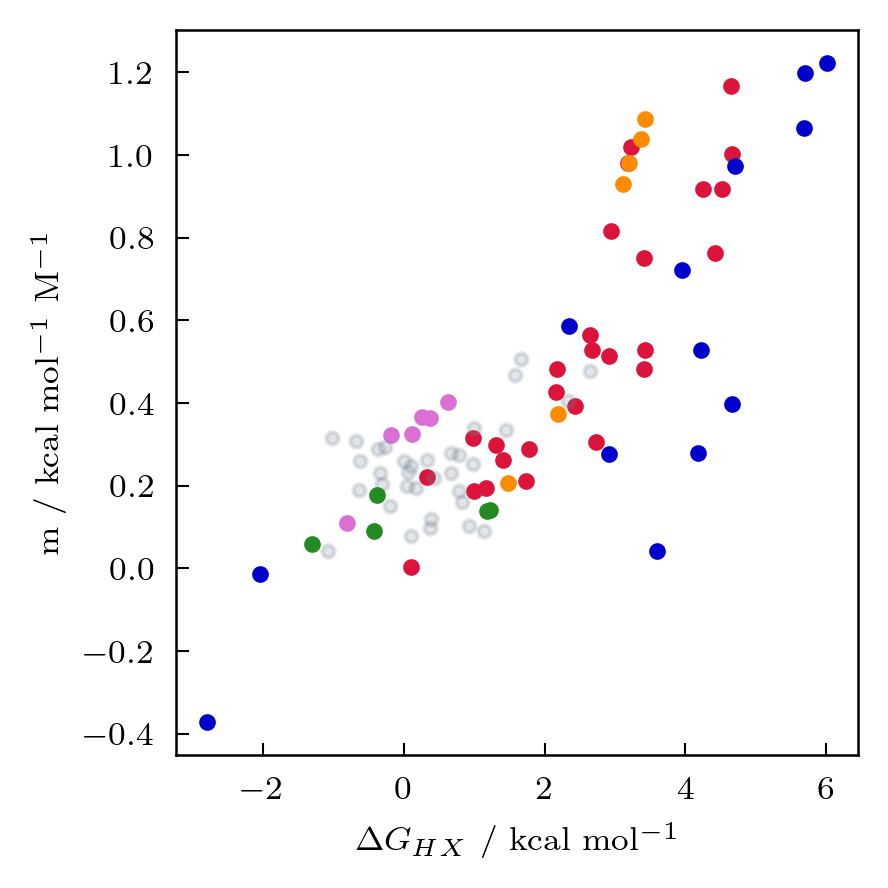

In [50]:
f1, ax1 = plt.subplots(figsize=(3,3), dpi=300)
for i, c in enumerate(color_arr[res]):
    if c == 'slategray':
        alpha = 0.2
    else:
        alpha = 1.0
    ax1.plot(dGhx_D[0,i], mValue[0,i], '.', color=c, alpha=alpha, markersize=6)
ax1.set_xlabel('$\Delta G_{HX}$ / kcal mol$^{-1}$')
ax1.set_ylabel('m / kcal mol$^{-1}$ M$^{-1}$')
f1.tight_layout()

## different sensitivity to urea

In [56]:
def den_sens(den, w1, m, PS, m_sens=0.05, T_target=0.875):
    n_res = PS.shape[2]
    
    TT = T_target / 0.85 * 298
    # dG at different [den]
    dGhx_D = []
    for d in den:
        # weight depends on denaturant concentration
        w = np.exp(m * d / T_target) * w1
        w /= np.sum(w)

        probp = np.zeros(n_res)
        for j in range(n_res):
            pf_i = PS[:, start_frame:, j].flatten()
            probp[j] = np.sum(pf_i * w)
        dGhx_D.append(TT * np.log(probp / (1. - probp)) * 0.001987)
    dGhx_D = np.array(dGhx_D)

    # m-value: negative of initial slope of dG vs [den] 
    mValue = np.diff(dGhx_D, axis=0) / (den[0] - den[1])
    
    return dGhx_D, mValue

In [57]:
T_target = 0.875   # the T you want to use 
m_sens = 0.05  # it is the sensitivity of the denaturant.
                 # a larger value means a lower concentration 
                 # to unfold the protein
                 # 0.05 is a not bad initial guess for urea

# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:, start_frame:, :], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 5
den_bin = 50
den = np.linspace(den_min, den_max, den_bin+1)

# reweight to T_target

m = m_sens * -pf_frame
u_n = (cE0 / (T_target * kB)).flatten()
log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
w1 = np.exp(log_w1)
w1 /= np.sum(w1)

dGhx_D_05, mValue_05 = den_sens(den, w1, m, PS, m_sens=m_sens)

In [58]:
np.save(f"{result_dir}/dghx_den_05.npy", dGhx_D_05)
np.save(f"{result_dir}/m_sens05.npy", mValue_05)

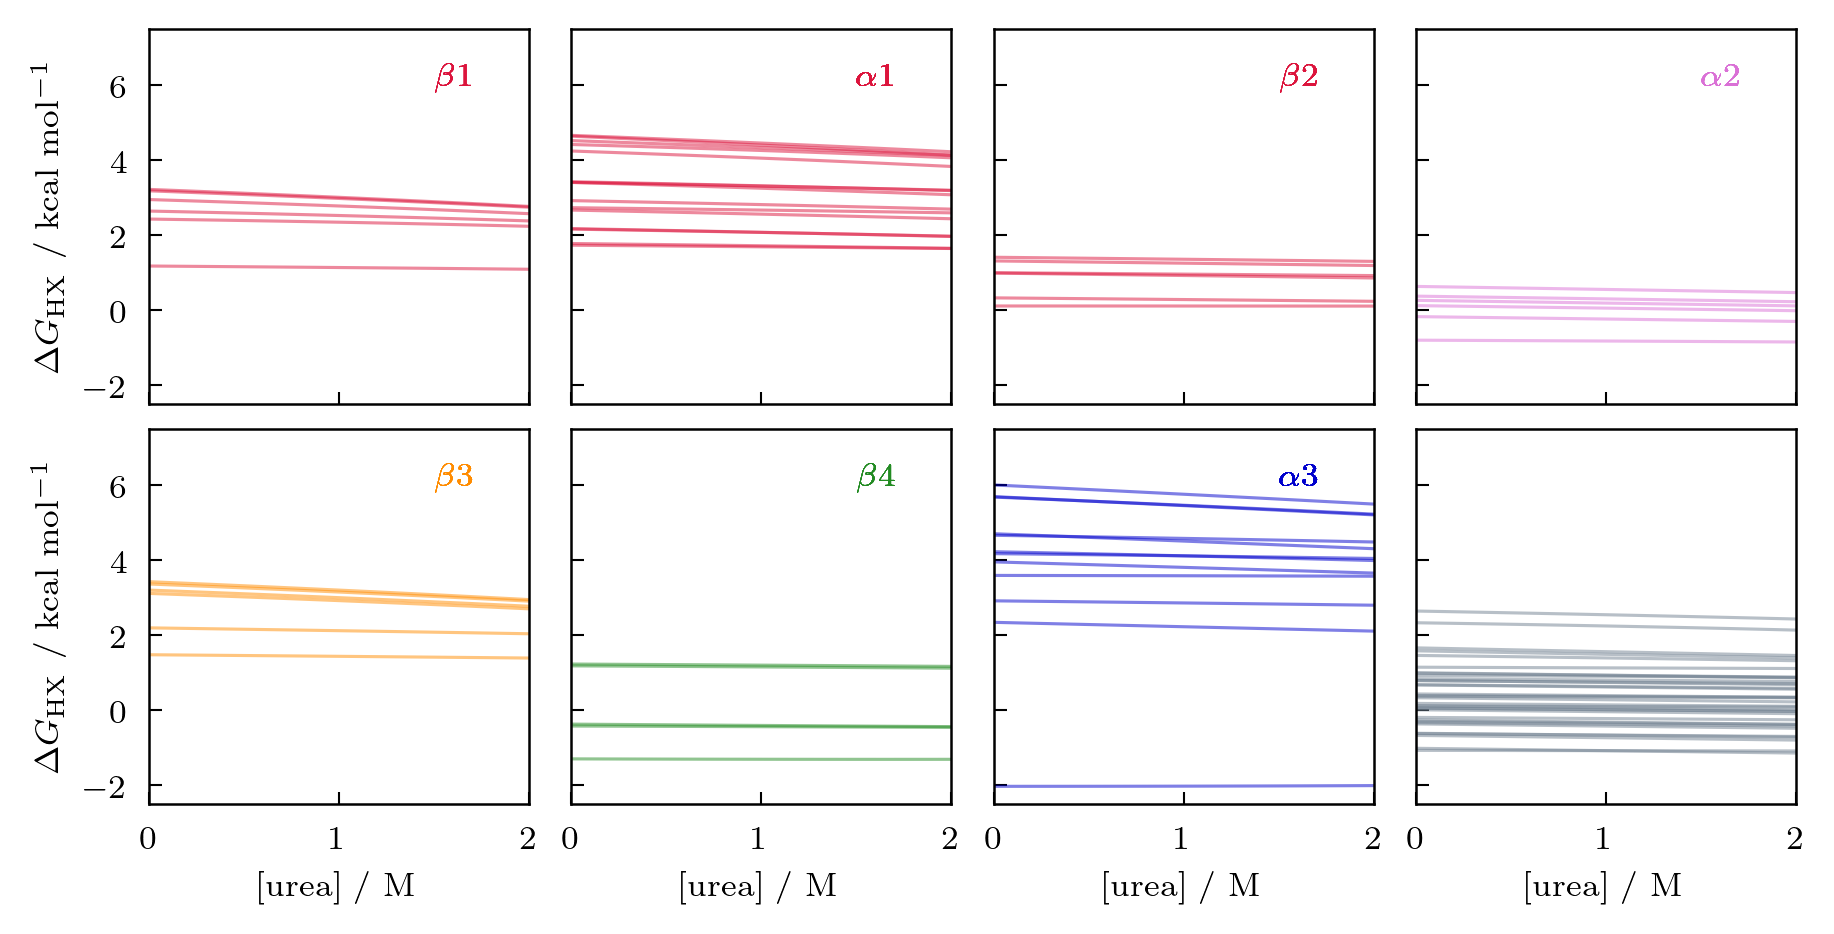

In [60]:
f, ax = plt.subplots(2, 4, figsize=(6,3), dpi=300, sharey=True, sharex=True, constrained_layout=True)

for i, (r, color) in enumerate(zip(res, color_arr[res])):
    if r >= 8 and r <= 13:
        j, k = 0, 0
        text = r'$\beta 1$'
    elif r >= 20 and r <= 34:
        j, k = 0, 1
        text = r'$\alpha 1$'
    elif r >= 40 and r <= 45:
        j, k = 0, 2
        text = r'$\beta 2$'
    elif r >= 49 and r <= 55:
        j, k = 0, 3
        text = r'$\alpha 2$'
    elif r >= 63 and r <= 68:
        j, k = 1, 0
        text = r'$\beta 3$'
    elif r >= 72 and r <= 76:
        j, k = 1, 1
        text = r'$\beta 4$'
    elif r >= 83 and r <= 95:
        j, k = 1, 2
        text = r'$\alpha 3$'
    else: 
        j, k = 1, 3
        text=''
    ax[j, k].plot(den, dGhx_D_05[:,i], color=color, alpha=0.5)
    ax[j, k].text(1.5, 6, text, color=color)

ax[0,0].set_xlim([0, 2])
ax[0,0].set_ylim([-2.5, 7.5])
for a in ax.flat:
    a.set_xlabel('[urea] / M')
    a.set_ylabel('$\Delta G_{\mathrm{HX}}$ / kcal mol$^{-1}$')
    a.label_outer()

In [61]:
T_target = 0.875   # the T you want to use 
m_sens = 0.10  # it is the sensitivity of the denaturant.
                 # a larger value means a lower concentration 
                 # to unfold the protein
                 # 0.05 is a not bad initial guess for urea

# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:, start_frame:, :], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 5
den_bin = 50
den = np.linspace(den_min, den_max, den_bin+1)

# reweight to T_target

m = m_sens * -pf_frame
u_n = (cE0 / (T_target * kB)).flatten()
log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
w1 = np.exp(log_w1)
w1 /= np.sum(w1)

dGhx_D_10, mValue_10 = den_sens(den, w1, m, PS, m_sens=m_sens)

In [62]:
np.save(f"{result_dir}/dghx_den_10.npy", dGhx_D_10)
np.save(f"{result_dir}/m_sens10.npy", mValue_10)

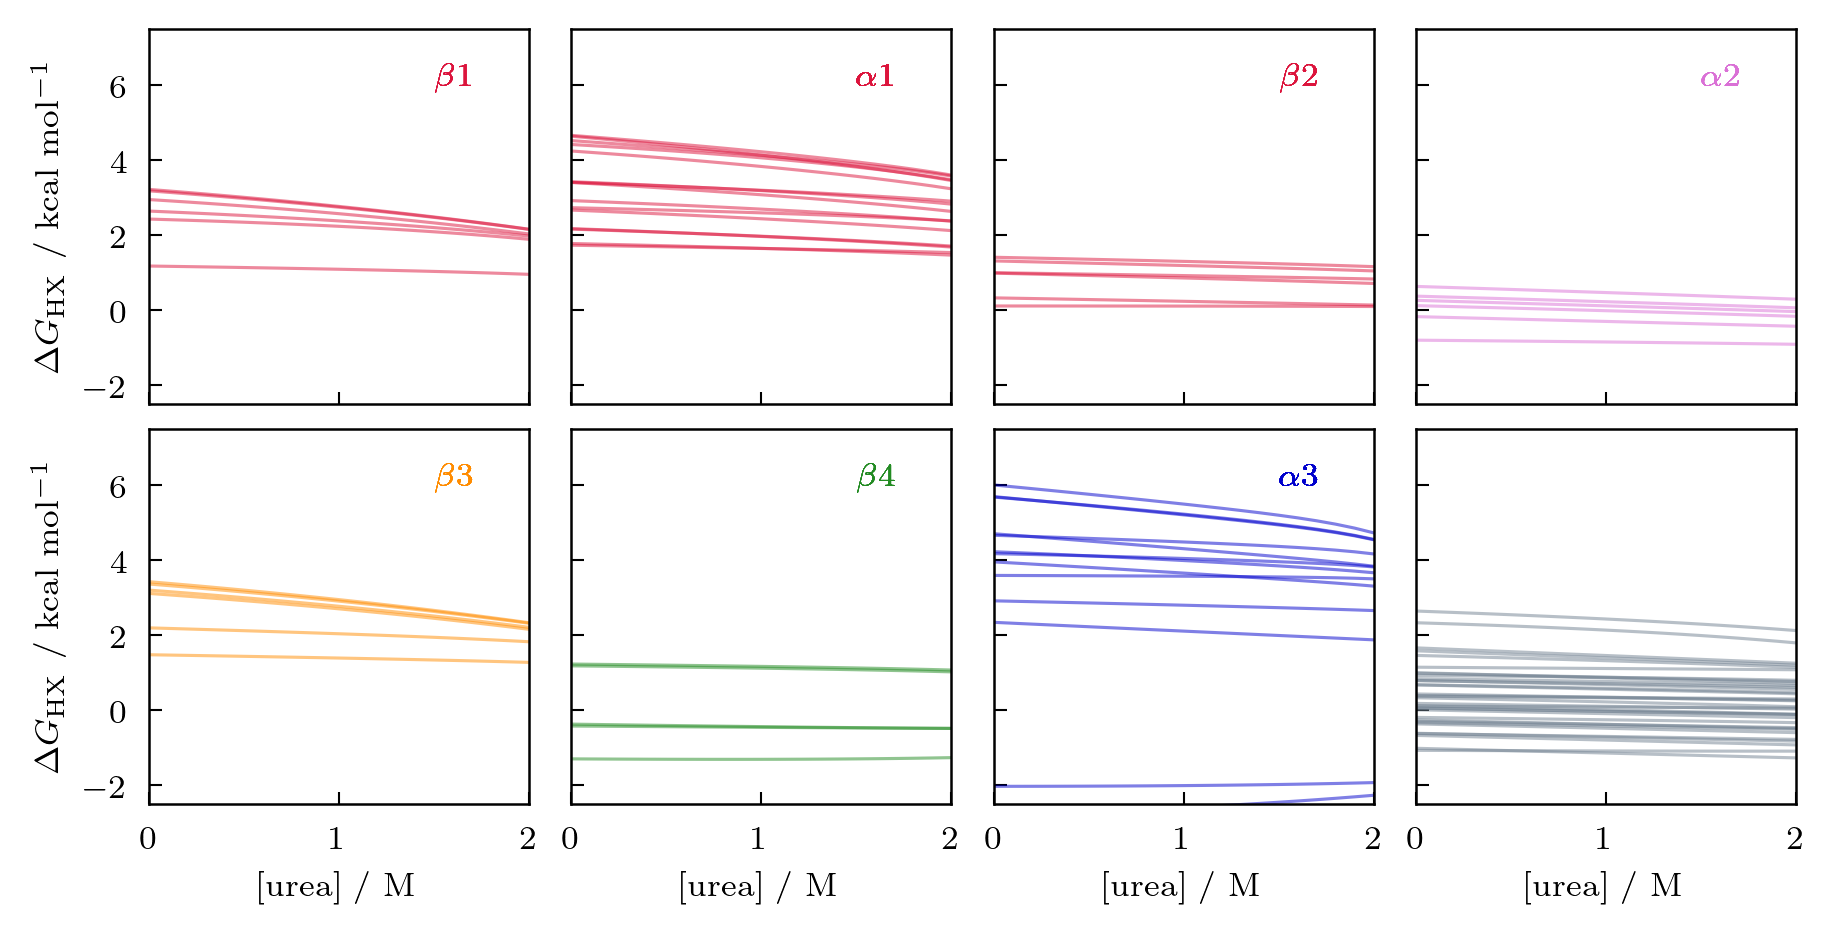

In [63]:
f, ax = plt.subplots(2, 4, figsize=(6,3), dpi=300, sharey=True, sharex=True, constrained_layout=True)

for i, (r, color) in enumerate(zip(res, color_arr[res])):
    if r >= 8 and r <= 13:
        j, k = 0, 0
        text = r'$\beta 1$'
    elif r >= 20 and r <= 34:
        j, k = 0, 1
        text = r'$\alpha 1$'
    elif r >= 40 and r <= 45:
        j, k = 0, 2
        text = r'$\beta 2$'
    elif r >= 49 and r <= 55:
        j, k = 0, 3
        text = r'$\alpha 2$'
    elif r >= 63 and r <= 68:
        j, k = 1, 0
        text = r'$\beta 3$'
    elif r >= 72 and r <= 76:
        j, k = 1, 1
        text = r'$\beta 4$'
    elif r >= 83 and r <= 95:
        j, k = 1, 2
        text = r'$\alpha 3$'
    else: 
        j, k = 1, 3
        text=''
    ax[j, k].plot(den, dGhx_D_10[:,i], color=color, alpha=0.5)
    ax[j, k].text(1.5, 6, text, color=color)

ax[0,0].set_xlim([0, 2])
ax[0,0].set_ylim([-2.5, 7.5])
for a in ax.flat:
    a.set_xlabel('[urea] / M')
    a.set_ylabel('$\Delta G_{\mathrm{HX}}$ / kcal mol$^{-1}$')
    a.label_outer()

# Compare against Sup's data

## Try different Upside termperatures and $m$ sensitivities to best match experimental $m$-values

In [79]:
T_targets = np.linspace(0.8, 0.9, 5)
m_senss = np.linspace(0.15, 0.5, 8)
dGhx_D_all = np.zeros((5, 8, 51, 92))
mValue_all = np.zeros((5, 8, 50, 92))
    
# the number of protected residues in evergy frame
pf_frame = np.sum(PS[:, start_frame:, :], axis=2).flatten()

# [den]
den_min = 0.0
den_max = 5
den_bin = 50
den = np.linspace(den_min, den_max, den_bin+1)
for i, T_target in enumerate(T_targets):
    for j, m_sens in enumerate(m_senss):
        print(f"Computing m-value for T = {T_target} and m sensitivity = {m_sens}")
        # reweight to T_target
        m = m_sens * -pf_frame
        u_n = (cE0 / (T_target * kB)).flatten()
        log_w1 = mbar0._computeUnnormalizedLogWeights(u_n)
        w1 = np.exp(log_w1)
        w1 /= np.sum(w1)

        dGhx_D_new, mValue_new = den_sens(den, w1, m, PS, m_sens=m_sens)
        dGhx_D_all[i, j] = dGhx_D_new
        mValue_all[i, j] = mValue_new

Computing m-value for T = 0.8 and m sensitivity = 0.15
Computing m-value for T = 0.8 and m sensitivity = 0.19999999999999998
Computing m-value for T = 0.8 and m sensitivity = 0.25
Computing m-value for T = 0.8 and m sensitivity = 0.3
Computing m-value for T = 0.8 and m sensitivity = 0.35
Computing m-value for T = 0.8 and m sensitivity = 0.39999999999999997
Computing m-value for T = 0.8 and m sensitivity = 0.44999999999999996
Computing m-value for T = 0.8 and m sensitivity = 0.5
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.15
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.19999999999999998
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.25
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.3
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.35
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.39999999999999997
Computing m-value for T = 0.8250000000000001 and m sensitivity = 0.4

In [85]:
mValue_all.shape

(5, 8, 50, 92)

In [86]:
mValue_all = mValue_all[..., :-1]
print(mValue_all.shape)

(5, 8, 50, 91)


In [91]:
den_start = 0
den_end = 5
mVs = []
r1s = []
mVs_sims = []
mVs_als = []

for i, T in enumerate(T_targets):
    for j, m_sens in enumerate(m_senss):
        # compute average m-value for first 5 den conc (0 - 0
        mV = np.mean(mValue_all[i, j, den_start:den_end], axis=0)
        # ex2 residues
        exp_mask = np.isin(res + 1, a_ms[a_ms[:, -2] == 1, -1].astype(int))
        mVs_sim = mV[exp_mask]
        mVs_al = a_ms[a_ms[: ,-2] == 1, 3] / 4.184

        r1, p1 = sps.pearsonr(mVs_sim, mVs_al)
        res1 = (np.sum((mVs_sim - mVs_al)**2) / len(mVs_sim))**0.5

        r1s.append([r1, res1, T])
        print(f"{r1:.2f}, {res1:.2f}, {T:.3f}, {m_sens:.2f}")
        mVs.append(mV[np.isin(res + 1, a_ms[:, -1].astype(int))])
        mVs_sims.append(mVs_sim)
        mVs_als.append(mVs_al)

0.65, 0.58, 0.800, 0.15
0.65, 0.51, 0.800, 0.20
0.66, 0.46, 0.800, 0.25
0.66, 0.44, 0.800, 0.30
0.66, 0.44, 0.800, 0.35
0.66, 0.48, 0.800, 0.40
0.66, 0.54, 0.800, 0.45
0.66, 0.62, 0.800, 0.50
0.63, 0.56, 0.825, 0.15
0.63, 0.49, 0.825, 0.20
0.63, 0.43, 0.825, 0.25
0.63, 0.39, 0.825, 0.30
0.63, 0.39, 0.825, 0.35
0.63, 0.43, 0.825, 0.40
0.62, 0.50, 0.825, 0.45
0.62, 0.59, 0.825, 0.50
0.58, 0.51, 0.850, 0.15
0.58, 0.43, 0.850, 0.20
0.57, 0.37, 0.850, 0.25
0.56, 0.36, 0.850, 0.30
0.55, 0.40, 0.850, 0.35
0.54, 0.49, 0.850, 0.40
0.53, 0.61, 0.850, 0.45
0.52, 0.76, 0.850, 0.50
0.51, 0.45, 0.875, 0.15
0.50, 0.38, 0.875, 0.20
0.50, 0.38, 0.875, 0.25
0.49, 0.47, 0.875, 0.30
0.50, 0.63, 0.875, 0.35
0.53, 0.88, 0.875, 0.40
0.58, 1.23, 0.875, 0.45
0.63, 1.77, 0.875, 0.50
0.64, 0.38, 0.900, 0.15
0.69, 0.71, 0.900, 0.20
0.73, 1.34, 0.900, 0.25
0.76, 2.19, 0.900, 0.30
0.77, 3.23, 0.900, 0.35
0.77, 4.35, 0.900, 0.40
0.76, 5.43, 0.900, 0.45
0.76, 6.26, 0.900, 0.50


In [107]:
# best temp/m_sens
ix = np.argmin(np.asarray(r1s)[:, 1])
print(np.asarray(r1s)[ix, 1])
t_id, s_id = np.unravel_index(ix, (5, 8))
print(t_id, s_id)
print(T_targets[t_id])
print(m_senss[s_id])

0.35791771784704113
2 3
0.8500000000000001
0.3


It appears the best temperature is $T = 0.85$ and sensitivity of $0.3$

In [108]:
np.save(f"{result_dir}/dghx_den_best.npy", dGhx_D_all[2, 3])
np.save(f"{result_dir}/m_sensbest.npy", mValue_all[2, 3])

Text(1.0, -0.1, '$r=0.56$\n RMSE = 0.36')

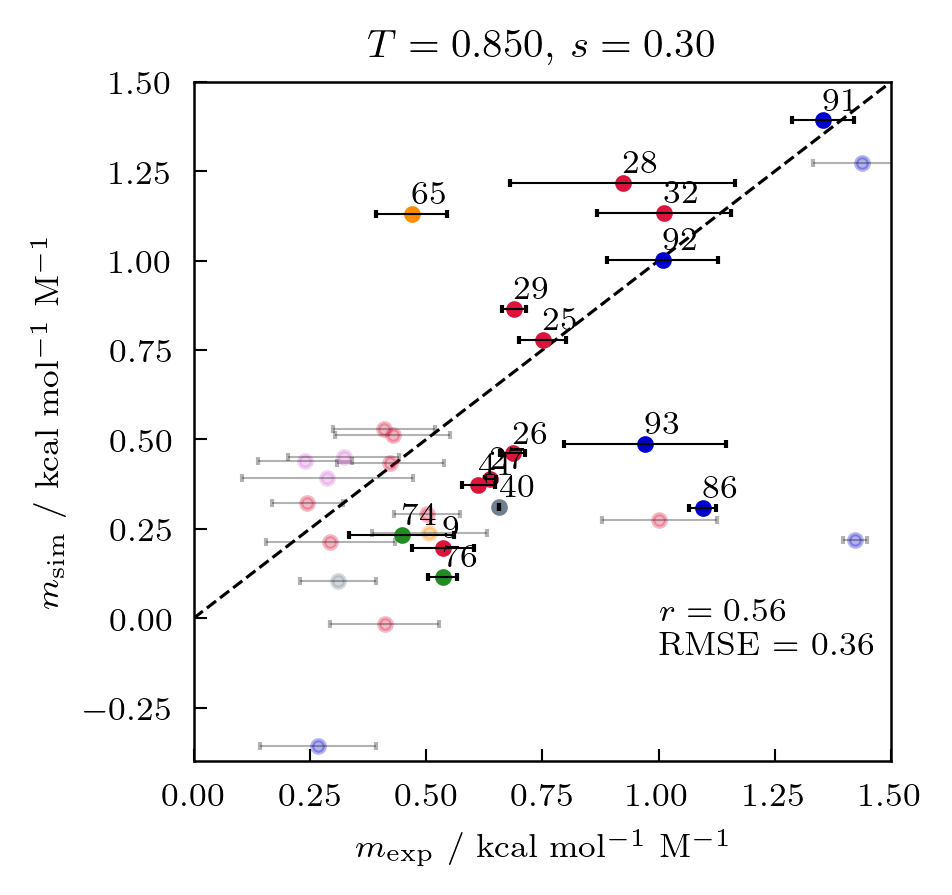

In [127]:
model_id = ix
T_id, msens_id = divmod(model_id, 8)

f, ax = plt.subplots(figsize=(3,3), dpi=300)

exp_mask = np.isin(np.arange(1, 100),a_ms[:,-1].astype(int))
colors1 = color_arr[exp_mask]
alphas1 = alpha_arr[exp_mask]

for adg, adge, dg, c, a, rid in zip(
        a_ms[:, 3], a_ms[:, 5], mVs[model_id], colors1, alphas1, a_ms[:, -1]):
    ax.plot(adg / 4.184, dg, '.', color=c, alpha=a[2], ms=6)
    ax.errorbar(adg / 4.184, dg, xerr=(adge / 4.184), ecolor='black', fmt='none', elinewidth=0.5, capsize=1, alpha=a[2])
    if a[2] == 1:
        ax.annotate(str(int(rid)), (adg / 4.184, dg + 0.03))
    
ax.set_xlabel('$m_{\mathrm{exp}}$ / kcal mol$^{-1}$ M$^{-1}$')
ax.set_ylabel('$m_{\mathrm{sim}}$ / kcal mol$^{-1}$ M$^{-1}$')
ax.set_xlim([0, 1.5])
ax.set_ylim([-0.4, 1.5])
ax.plot(np.linspace(0, 1.5, 10), np.linspace(0, 1.5, 10), 'k--', zorder=0)
ax.set_title(f'$T = {T_targets[T_id]:.3f}$, $s={m_senss[s_id]:.2f}$')
ax.annotate(f'$r={r1s[ix][0]:.2f}$\n RMSE = {r1s[ix][1]:.2f}', (1.0, -0.1))

## Check correlation with regular $\Delta G$'s (as a function of temperature)

In [ ]:
in_region1 = a_dgs1[:, -2].astype(bool)
in_region2 = a_dgs2[:, -2].astype(bool)
a_dgs1_trimmed = a_dgs1[in_region1]
a_dgs2_trimmed = a_dgs2[in_region2]

r1s = []
r2s = []
print("Residue #:\tR^2 (pH 4.5), residual (pH 4.5), R^2 (pH 6.5), residual (pH 6.5)")
for i, dG in enumerate(dGhx_T):
    dG_trimmed1 = dG[np.isin(res + 1, a_dgs1_trimmed[:, -1].astype(int))]
    dG_trimmed2 = dG[np.isin(res + 1, a_dgs2_trimmed[:, -1].astype(int))]
    # Pearson r-values
    r1, p1 = sps.pearsonr(dG_trimmed1, a_dgs1_trimmed[:, 4])
    r2, p2 = sps.pearsonr(dG_trimmed2, a_dgs2_trimmed[:, 4])
    # residuals
    res1 = (np.sum((dG_trimmed1 - a_dgs1_trimmed[:, 4])**2) / float(len(dG_trimmed1)))**0.5
    res2 = (np.sum((dG_trimmed2 - a_dgs2_trimmed[:, 4])**2) / float(len(dG_trimmed2)))**0.5
    r1s.append([r1, res1])
    r2s.append([r2, res2])
    print(f"Residue {res[i]}:\t{r1:2.2f}, {res1:2.2f}, {r2:2.2f}, {res2:2.2f}")

Residue #:	R^2 (pH 4.5), residual (pH 4.5), R^2 (pH 6.5), residual (pH 6.5)
Residue 1:	0.40, 2.49, 0.50, 2.52
Residue 3:	0.39, 2.42, 0.49, 2.47
Residue 4:	0.39, 2.37, 0.48, 2.43
Residue 5:	0.39, 2.32, 0.48, 2.39
Residue 6:	0.38, 2.27, 0.47, 2.36
Residue 7:	0.38, 2.22, 0.47, 2.33
Residue 8:	0.38, 2.18, 0.46, 2.30
Residue 9:	0.37, 2.15, 0.46, 2.28
Residue 10:	0.37, 2.11, 0.45, 2.26
Residue 11:	0.37, 2.08, 0.45, 2.24
Residue 12:	0.36, 2.05, 0.44, 2.22
Residue 13:	0.36, 2.03, 0.44, 2.21
Residue 14:	0.36, 2.01, 0.44, 2.20
Residue 15:	0.35, 1.99, 0.43, 2.20
Residue 16:	0.35, 1.97, 0.43, 2.19
Residue 17:	0.34, 1.95, 0.42, 2.19
Residue 19:	0.34, 1.94, 0.42, 2.19
Residue 20:	0.33, 1.92, 0.42, 2.20
Residue 21:	0.33, 1.91, 0.41, 2.20
Residue 22:	0.32, 1.90, 0.41, 2.21
Residue 23:	0.32, 1.90, 0.41, 2.23
Residue 24:	0.31, 1.90, 0.41, 2.25
Residue 25:	0.30, 1.91, 0.40, 2.27
Residue 26:	0.30, 1.92, 0.40, 2.30
Residue 27:	0.29, 1.93, 0.40, 2.34
Residue 28:	0.28, 1.96, 0.39, 2.39
Residue 29:	0.27, 2.00

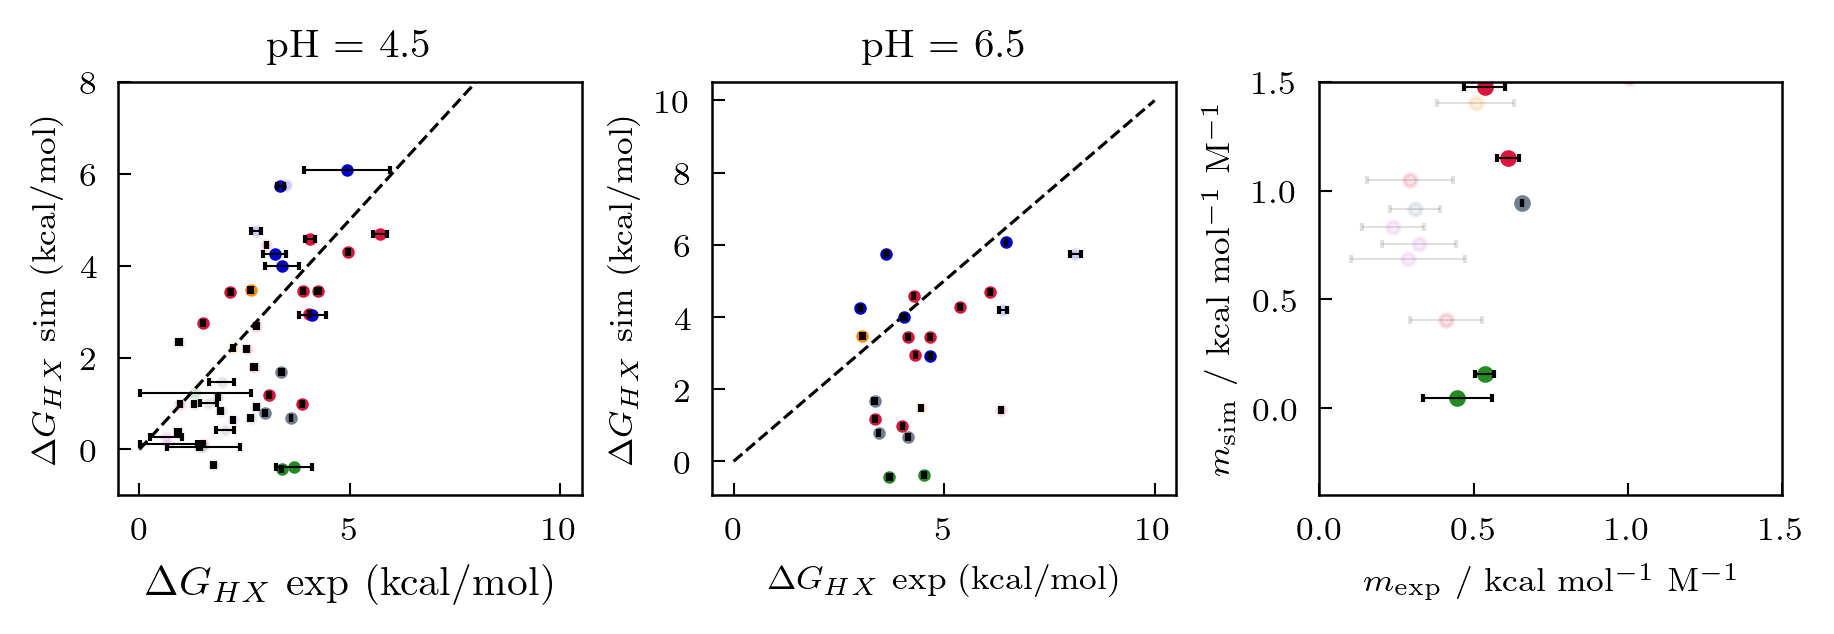

In [122]:
f, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=300, sharey=False, sharex=False, constrained_layout=True)
temp_id = 19

# 1: pH 4.5; 2: pH 6.5
dG = dGhx_T[temp_id]
dGs1 = dG[np.isin(res + 1, a_dgs1[:,-1].astype(int))]
dGs2 = dG[np.isin(res + 1, a_dgs2[:,-1].astype(int))]

colors1 = color_arr[np.isin(np.arange(1, 100),a_dgs1[:, -1].astype(int))]
colors2 = color_arr[np.isin(np.arange(1, 100),a_dgs2[:, -1].astype(int))]

alphas1 = alpha_arr[np.isin(np.arange(1, 100),a_dgs1[:, -1].astype(int))]
alphas2 = alpha_arr[np.isin(np.arange(1, 100),a_dgs2[:, -1].astype(int))]

for adg, adge, dg, c, a, rid in zip(a_dgs1[:,4], a_dgs1[:,6], dGs1, colors1, alphas1, a_dgs1[:,-1]):
    axs[0]. scatter(adg, dg, color=c, alpha=a[0])
    axs[0].errorbar(adg, dg, xerr=adge, ecolor='black', fmt='none',elinewidth=0.5,capsize=1)
    # if a[0] == 1:
    #     axs[0].annotate(str(int(rid)), (adg, dg))
    
for adg, adge, dg, c, a, rid in zip(a_dgs2[:,4], a_dgs2[:,6], dGs2, colors2, alphas2, a_dgs2[:,-1]):
    axs[1]. scatter(adg, dg, color=c, alpha=a[1])
    axs[1].errorbar(adg, dg, xerr=adge, ecolor='black', fmt='none',elinewidth=0.5,capsize=1)
    # if a[1] == 1:
    #     axs[1].annotate(str(int(rid)), (adg, dg))

axs[0].set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)', fontsize=10)
axs[1].set_xlabel(r'$\Delta G_{HX}$ exp (kcal/mol)')
axs[0].set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
axs[1].set_ylabel(r'$\Delta G_{HX}$ sim (kcal/mol)')
axs[0].plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k--', zorder=0)
axs[1].plot(np.linspace(0,10,10), np.linspace(0,10,10), 'k--', zorder=0)
axs[0].set_title('pH = 4.5')
axs[1].set_title('pH = 6.5')

axs[0].set_ylim((-1,8))

exp_mask = np.isin(np.arange(1, 100),a_ms[:,-1].astype(int))
colors1 = color_arr[exp_mask]
alphas1 = alpha_arr[exp_mask]

for adg, adge, dg, c, a, rid in zip(
        a_ms[:, 3], a_ms[:, 5], mVs[model_id], colors1, alphas1, a_ms[:, -1]):
    axs[2].plot(adg / 4.184, dg, '.', color=c, alpha=a[2], ms=6)
    axs[2].errorbar(adg / 4.184, dg, xerr=(adge / 4.184), ecolor='black', fmt='none', elinewidth=0.5, capsize=1, alpha=a[2])
    # if a[2] == 1:
    #     axs[2].annotate(str(int(rid)), (adg / 4.184, dg + 0.03))
    
axs[2].set_xlabel('$m_{\mathrm{exp}}$ / kcal mol$^{-1}$ M$^{-1}$')
axs[2].set_ylabel('$m_{\mathrm{sim}}$ / kcal mol$^{-1}$ M$^{-1}$')
axs[2].set_xlim([0, 1.5])
axs[2].set_ylim([-0.4, 1.5])
axs[2].plot(np.linspace(0, 1.5, 10), np.linspace(0, 1.5, 10), 'k--', zorder=0)
